<a href="https://colab.research.google.com/github/sugarfreecode/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/k_means_to_k_modes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###K-modes to K-Means

In [1]:
# improts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
!pip install chart_studio
import chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=dcb0aad380d799c03cd9fa87db25bcb3adec5ee2d259c19bd1055ac23f82e51a
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
columns = ['class','date','plant-stand', 'precip', 'temp',
'hail', 'crop-hist', 'area-damaged', 'severity', 'seed-tmt', 'germination',
'plant-growth', 'leaves', 'leafspots-halo', 'leafspots-marg', 'leafspot-size',
'leaf-shread', 'leaf-malf', 'leaf-mild', 'stem', 'lodging', 'stem-cankers',
'canker-lesion', 'fruiting-bodies', 'external decay', 'mycelium',
'int-discolor', 'sclerotia', 'fruit-pods', 'fruit spots', 'seed',
'mold-growth', 'seed-discolor', 'seed-size', 'shriveling', 'roots']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/soybean/soybean-large.data'
df = pd.read_csv(url)
df.columns=columns
pd.set_option("max_columns", None)
df.head()

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,plant-growth,leaves,leafspots-halo,leafspots-marg,leafspot-size,leaf-shread,leaf-malf,leaf-mild,stem,lodging,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,1,1,1,0,2,2,0,0,0,1,0,3,1,1,1,0,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,2,1,1,0,2,2,0,0,0,1,0,3,0,1,1,0,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,1,1,1,0,2,2,0,0,0,1,0,3,0,1,1,0,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,2,1,1,0,2,2,0,0,0,1,0,3,1,1,1,0,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,5,0,2,1,0,3,0,1,0,1,1,1,0,2,2,0,0,0,1,0,3,0,1,1,0,0,0,0,4,0,0,0,0,0,0


##Let's work through k-means clustering algorithm by hand 

In [2]:
# let's generate some numerical classification data
from sklearn.datasets import make_blobs
points, center = make_blobs(n_samples=100, centers=3, n_features=2)
print(points[:10])
print(center)

[[-4.04476314  6.60642617]
 [ 6.04884525  7.38576464]
 [-2.9022062   8.70924677]
 [ 5.74621392  5.68272183]
 [-5.53499913 -7.60638971]
 [-5.32084776  5.44075914]
 [ 5.80151949  6.13746345]
 [-5.24561801 -5.81410557]
 [-5.49974028 -5.63002498]
 [ 5.7318074   6.52586748]]
[0 1 0 1 2 0 1 2 2 1 2 2 2 0 2 1 1 1 0 2 2 0 0 2 0 2 2 2 0 2 0 0 1 0 2 1 2
 0 1 0 1 0 2 0 1 1 0 0 2 2 2 1 1 1 1 1 1 2 0 1 1 0 1 1 2 2 2 0 1 1 2 2 2 1
 2 2 0 1 0 0 1 0 2 2 0 0 1 1 1 1 0 0 0 2 0 0 0 2 1 0]


In [3]:
# create a dataframe
df = pd.DataFrame(dict(x=points[:,0], y=points[:, 1], label=center))
df.head()

,x,y,label
0,-4.044763,6.606426,0
1,6.048845,7.385765,1
2,-2.902206,8.709247,0
3,5.746214,5.682722,1
4,-5.534999,-7.606390,2


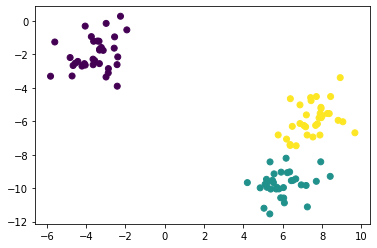

In [4]:
# plot clusters
plt.scatter(x=df['x'], y=df['y'], c=df['label'])

In [28]:
# plotly plot 
import plotly.express as px 

fig_1 = px.scatter(df, x='x', y='y', color_discrete_sequence=px.colors.qualitative.Antique, color='label')
fig_1.update_layout(
    width=700,
    height=500
)
fig_1.update_coloraxes(showscale=False)
fig_1.show()

In [46]:
import plotly.graph_objects as go

fig_2 = go.Figure(data=go.Scatter(
    x=df['x'],
    y=df['y'],
    mode='markers',
    marker=dict(
        size=16,
        color=df['label'],
        colorscale='Viridis',
        showscale=False
    )),
    layout=go.Layout(
           margin=dict(
               t=0,
               b=0)
           )
    )
    
fig_2.update_layout(
    showlegend=False,
    width=800,
    height=400
)

fig_2.show()

In [50]:
# create a new df, drop cluster column 
points = df.drop('label', axis=1)
points.head()

,x,y
0,-4.044763,6.606426
1,6.048845,7.385765
2,-2.902206,8.709247
3,5.746214,5.682722
4,-5.534999,-7.606390


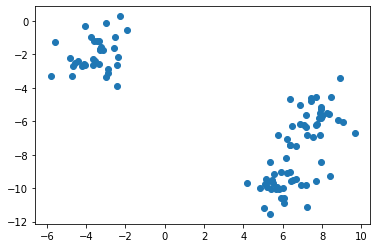

In [6]:
# plot clusters without cluster specification 
plt.scatter(points['x'], points['y'])

In [51]:
# generate 3 fake centroids, these will get updated
centroids = points.sample(3)
centroids = centroids.reset_index(drop=True)
centroids

,x,y
0,-2.782901,7.365501
1,5.588052,5.686468
2,5.746214,5.682722


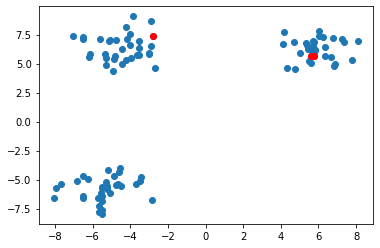

In [52]:
# plot clusters and initial centroids
plt.scatter(points['x'], points['y'])
for i in range(len(centroids)):
  plt.plot(centroids.iloc[i,0], centroids.iloc[i,1], 'or')

In [60]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=points['x'],
    y=points['y'],
    mode='markers',
    marker=dict(
        size=16,
        colorscale='Viridis',
        showscale=False
    )),
)

fig.add_trace(go.Scatter(
    x=centroids['x'],
    y=centroids['y'],
    mode='markers',
    marker=dict(
        size=16,
        color='red')
    )
)
    
fig.update_layout(
    showlegend=False,
    width=800,
    height=400,
    margin=dict(
        t=0,
        b=0)
)

fig.show()

##Functions

In [64]:
# write a function that would calculate euclidian distances to centroid
from scipy.spatial import distance
import math
import numpy as np


def get_nearest_centroid(df, centroids, iter):
  '''
  For each point in the dataset calculates 
  nearest cluster
  '''
  # make a copy of the dataframe 
  df_new = pd.DataFrame(df[['x', 'y']])
  # find distances
  distances = distance.cdist(df, centroids, 'euclidean')
  # find centroids
  nearest_centroid = np.argmin(distances, axis=1)
  # create a new column in the dataframe
  df_new['cluster_'+iter] = nearest_centroid
  return df_new

def get_centroids(df, column_header):
  '''
  Averages clusters by mean to get 
  updated centroids
  '''
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

## Lets first iterate by hand and than write a loop

In [12]:
# what points look like right now
points.head()

,x,y
0,5.172158,-9.471923
1,6.377278,-7.446894
2,-4.048996,-2.642008
3,-3.346217,-1.213250
4,6.485372,-6.306033


In [13]:
# what centroids look like right now
centroids

,x,y
0,-3.621388,-1.217302
1,7.707426,-9.591596
2,5.558162,-9.147000


In [65]:
# first iteration clusters 
first_pass = get_nearest_centroid(points, centroids, '1')
first_pass.head()

,x,y,cluster_1
0,-4.044763,6.606426,0
1,6.048845,7.385765,2
2,-2.902206,8.709247,0
3,5.746214,5.682722,2
4,-5.534999,-7.606390,0


In [68]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=points['x'],
    y=points['y'],
    mode='markers',
    marker=dict(
        color=first_pass['cluster_1'],
        size=16,
        colorscale='Viridis',
        showscale=False
    )),
)

fig.add_trace(go.Scatter(
    x=centroids['x'],
    y=centroids['y'],
    mode='markers',
    marker=dict(
        size=16,
        color='red')
    )
)
    
fig.update_layout(
    showlegend=False,
    width=800,
    height=400,
    margin=dict(
        t=0,
        b=0)
)

fig.show()

In [70]:
# first iteration centroids 
first_pass_centriods = get_centroids(first_pass, 'cluster_1')
first_pass_centriods 

,x,y
cluster_1,,
0,-4.959108,0.373451
1,5.083695,6.058781
2,6.487210,6.349563


In [73]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=points['x'],
    y=points['y'],
    mode='markers',
    marker=dict(
        color=first_pass['cluster_1'],
        size=16,
        colorscale='Viridis',
        showscale=False
    )),
)

fig.add_trace(go.Scatter(
    x=first_pass_centriods['x'],
    y=first_pass_centriods['y'],
    mode='markers',
    marker=dict(
        size=16,
        color='red')
    )
)
    
fig.update_layout(
    showlegend=False,
    width=800,
    height=400,
    margin=dict(
        t=0,
        b=0)
)

fig.show()

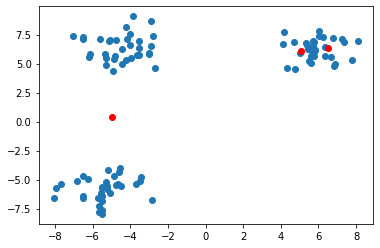

In [75]:
# plot and compare to initial centroids 
plt.scatter(first_pass['x'], first_pass['y'])
for i in range(len(first_pass_centriods )):
  plt.plot(first_pass_centriods.iloc[i, 0], first_pass_centriods.iloc[i, 1], 'or')

In [77]:
second_pass = get_nearest_centroid(points, first_pass_centriods, '2')
second_pass.head()

,x,y,cluster_2
0,-4.044763,6.606426,0
1,6.048845,7.385765,2
2,-2.902206,8.709247,1
3,5.746214,5.682722,1
4,-5.534999,-7.606390,0


In [78]:
# second iteration centroids 
second_pass_centriods = get_centroids(second_pass, 'cluster_2')
second_pass_centriods 

,x,y
cluster_2,,
0,-4.990273,0.247151
1,4.631007,6.141493
2,6.523912,6.439443


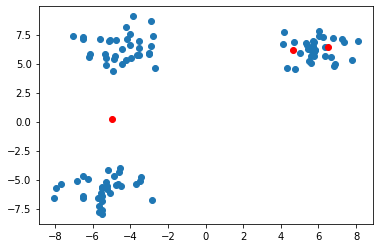

In [79]:
# plot and compare to initial centroids 
plt.scatter(second_pass['x'], second_pass['y'])
for i in range(len(second_pass_centriods )):
  plt.plot(second_pass_centriods.iloc[i, 0], second_pass_centriods.iloc[i, 1], 'or')

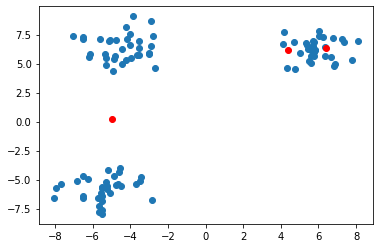

In [80]:
third_pass = get_nearest_centroid(points, second_pass_centriods, '3')
third_pass_centriods = get_centroids(third_pass, 'cluster_3')
plt.scatter(third_pass['x'], third_pass['y'])
for i in range(len(third_pass_centriods )):
  plt.plot(third_pass_centriods.iloc[i, 0], third_pass_centriods.iloc[i, 1], 'or')

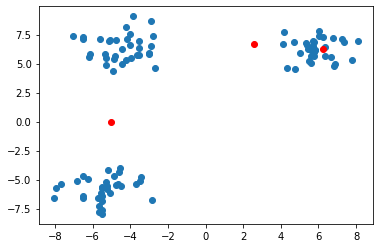

In [81]:
fourth_pass = get_nearest_centroid(points, third_pass_centriods, '3')
fourth_pass_centriods = get_centroids(fourth_pass, 'cluster_3')
plt.scatter(fourth_pass['x'], fourth_pass['y'])
for i in range(len(fourth_pass_centriods )):
  plt.plot(fourth_pass_centriods.iloc[i, 0], fourth_pass_centriods.iloc[i, 1], 'or')

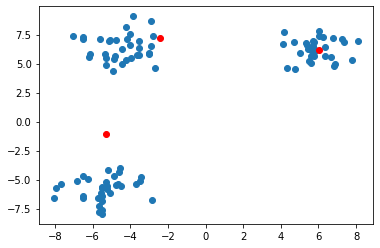

In [83]:
fifth_pass = get_nearest_centroid(points, fourth_pass_centriods, '3')
fifth_pass_centriods = get_centroids(fifth_pass, 'cluster_3')
plt.scatter(fifth_pass['x'], fifth_pass['y'])
for i in range(len(fifth_pass_centriods )):
  plt.plot(fifth_pass_centriods.iloc[i, 0], fifth_pass_centriods.iloc[i, 1], 'or')

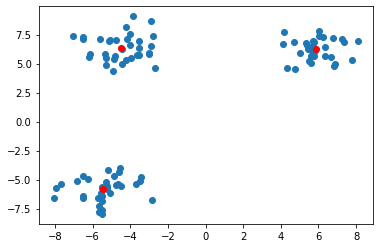

In [84]:
sixth_pass = get_nearest_centroid(points, fifth_pass_centriods, '3')
sixth_pass_centriods = get_centroids(sixth_pass, 'cluster_3')
plt.scatter(sixth_pass['x'], sixth_pass['y'])
for i in range(len(sixth_pass_centriods )):
  plt.plot(sixth_pass_centriods.iloc[i, 0], sixth_pass_centriods.iloc[i, 1], 'or')

In [96]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Scatter(
    x=points['x'],
    y=points['y'],
    mode='markers',
    marker=dict(
        color=third_pass['cluster_3'],
        size=16,
        colorscale='Viridis',
        showscale=False
    )),
    row=1,
    col=1
)

fig.add_trace(go.Scatter(
    x=third_pass_centriods['x'],
    y=third_pass_centriods['y'],
    mode='markers',
    marker=dict(
        size=16,
        color='red')
    ),
    row=1,
    col=1
)

fig.add_trace(go.Scatter(
    x=points['x'],
    y=points['y'],
    mode='markers',
    marker=dict(
        color=fourth_pass['cluster_3'],
        size=16,
        colorscale='Viridis',
        showscale=False
    )),
    row=1,
    col=2
)

fig.add_trace(go.Scatter(
    x=fourth_pass_centriods['x'],
    y=fourth_pass_centriods['y'],
    mode='markers',
    marker=dict(
        size=16,
        color='red')
    ),
    row=1,
    col=2
)

fig.add_trace(go.Scatter(
    x=points['x'],
    y=points['y'],
    mode='markers',
    marker=dict(
        color=fifth_pass['cluster_3'],
        size=16,
        colorscale='Viridis',
        showscale=False
    )),
    row=1,
    col=3
)

fig.add_trace(go.Scatter(
    x=fifth_pass_centriods['x'],
    y=fifth_pass_centriods['y'],
    mode='markers',
    marker=dict(
        size=16,
        color='red')
    ),
    row=1,
    col=3
)

fig.add_trace(go.Scatter(
    x=points['x'],
    y=points['y'],
    mode='markers',
    marker=dict(
        color=sixth_pass['cluster_3'],
        size=16,
        colorscale='Viridis',
        showscale=False
    )),
    row=1,
    col=4
)

fig.add_trace(go.Scatter(
    x=sixth_pass_centriods['x'],
    y=sixth_pass_centriods['y'],
    mode='markers',
    marker=dict(
        size=16,
        color='red')
    ),
    row=1,
    col=4
)
    
fig.update_layout(
    showlegend=False,
    width=1400,
    height=400,
    margin=dict(
        t=0,
        b=0)
)

fig.show()

In [23]:
fourth_pass_centriods.equals(third_pass_centriods)

True

In [24]:
fourth_pass.equals(third_pass)

True

In [12]:
points.head()

,x,y
0,2.196064,4.948729
1,6.071392,-4.125586
2,6.907625,-3.704806
3,2.274924,4.712242
4,-0.189356,8.882087


In [27]:
centroids

,x,y
0,-1.463289,-10.332423
1,0.989277,-3.858935
2,-0.037574,-3.885079


##For loop

It took 5 steps to find centroids


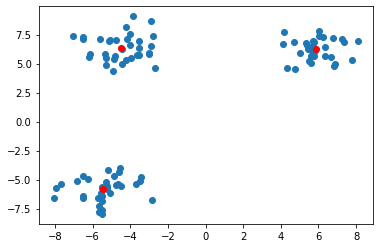

In [82]:
# let's write a for loop to calculate same centroids in less code
pass_i = get_nearest_centroid(points, centroids, str(0))
centroids_i = get_centroids(pass_i, 'cluster_'+str(0))
for i in range(1, 10):
  pass_before_i = pass_i.copy()
  centroids_before_i = centroids_i.copy()
  pass_i = get_nearest_centroid(points, centroids_i, str(i))
  centroids_i = get_centroids(pass_i, 'cluster_'+str(i))
  if pass_before_i['cluster_'+str(i-1)].equals(pass_i['cluster_'+str(i)]) and centroids_before_i.equals(centroids_i):
    print(f'It took {i-1} steps to find centroids')
    plt.scatter(pass_i['x'], pass_i['y'])
    for i in range(len(centroids_i)):
      plt.plot(centroids_i.iloc[i, 0], centroids_i.iloc[i, 1], 'or');
    break

In [111]:
centroids_i

,x,y
cluster_6,,
0,-5.443652,-5.817223
1,-4.488816,6.382047
2,5.891780,6.226201


##K-Means with sklearn

In [99]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=3)
kmeans.fit(points)
labels = kmeans.labels_
print(labels)

[0 2 0 2 1 0 2 1 1 2 1 1 1 0 1 2 2 2 0 1 1 0 0 1 0 1 1 1 0 1 0 0 2 0 1 2 1
 0 2 0 2 0 1 0 2 2 0 0 1 1 1 2 2 2 2 2 2 1 0 2 2 0 2 2 1 1 1 0 2 2 1 1 1 2
 1 1 0 2 0 0 2 0 1 1 0 0 2 2 2 2 0 0 0 1 0 0 0 1 2 0]


In [103]:
cluster_centers = kmeans.cluster_centers_
cluster_centers=pd.DataFrame(cluster_centers, columns=[['x', 'y']])
cluster_centers

,x,y
0,-4.488816,6.382047
1,-5.443652,-5.817223
2,5.891780,6.226201


In [105]:
cluster_centers['x']

,x
0,-4.488816
1,-5.443652
2,5.891780


In [109]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=points['x'],
    y=points['y'],
    mode='markers',
    marker=dict(
        color=labels,
        size=16,
        colorscale='Viridis',
        showscale=False
    )),
)

fig.add_trace(go.Scatter(
    x=centroids_i['x'],
    y=centroids_i['y'],
    mode='markers',
    marker=dict(
        size=16,
        color='red')
    )
)
    
fig.update_layout(
    showlegend=False,
    width=800,
    height=400,
    margin=dict(
        t=0,
        b=0)
)

fig.show()

In [128]:
pass_i = get_nearest_centroid(points, centroids, str(0))
centroids_i = get_centroids(pass_i, 'cluster_'+str(0))

# Create figure
fig = go.Figure()

for step in range(1,7):
  pass_before_i = pass_i.copy()
  centroids_before_i = centroids_i.copy()
  pass_i = get_nearest_centroid(points, centroids_i, str(step))
  centroids_i = get_centroids(pass_i, 'cluster_'+str(step))

  fig.add_trace(
        go.Scatter(
            visible=False,
            # line=dict(color="#00CED1", width=6),
            # name="𝜈 = " + str(step),
            x=pass_before_i['x'],
            y=pass_before_i['y'],
            mode='markers',
            marker=dict(
              color=pass_before_i['cluster_'+str(step-1)],
              size=16,
              colorscale='Viridis',
              showscale=False
              )
            )
        )
  
fig.data[0].visible = True

steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
    )]

fig.update_layout(
    sliders=sliders,
    width=800,
    height=500,
    margin=dict(
        t=0,
        b=0)
)



fig.show()

##K-modes by hand

1. using a simple matching dissimilarity measure for categorical objects, 
2. replacing means of clusters by modes, and
3. using a frequency-based method to find the modes to solve problem P2.


1. Select k initial modes, one for each cluster.
2. Allocate an object to the cluster whose mode is the nearest to it according to(5).Update the mode of the cluster after each allocation according to Theorem 1.
number of mismatches of categories between twoobjects
3. After all objects have been allocated to clusters,retest the dissimilarity of objects against the current modes. If an object is found such that its nearest mode belongs to another cluster rather than its current one, reallocate the object to that cluster and update the modes of both clusters.
4. Repeat 3 until no object has changed clusters after a full cycle test of the whole dataset.

In [2]:
import pandas as pd 
import numpy as np

# read in the data frame
columns = ['class','date','plant-stand', 'precip', 'temp',
'hail', 'crop-hist', 'area-damaged', 'severity', 'seed-tmt', 'germination',
'plant-growth', 'leaves', 'leafspots-halo', 'leafspots-marg', 'leafspot-size',
'leaf-shread', 'leaf-malf', 'leaf-mild', 'stem', 'lodging', 'stem-cankers',
'canker-lesion', 'fruiting-bodies', 'external decay', 'mycelium',
'int-discolor', 'sclerotia', 'fruit-pods', 'fruit spots', 'seed',
'mold-growth', 'seed-discolor', 'seed-size', 'shriveling', 'roots']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/soybean/soybean-large.data'
df_large = pd.read_csv(url, na_values='?')
df_large.columns=columns
pd.set_option("max_columns", None)
df_large.head()

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,plant-growth,leaves,leafspots-halo,leafspots-marg,leafspot-size,leaf-shread,leaf-malf,leaf-mild,stem,lodging,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,1.0,1.0,1,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,1.0,1,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,1,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,1,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,diaporthe-stem-canker,5.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0,0.0,1.0,1.0,1,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# looking for null values
df_large.isnull().sum()

class               0
date                1
plant-stand         8
precip             11
temp                7
hail               41
crop-hist           1
area-damaged        1
severity           41
seed-tmt           41
germination        36
plant-growth        1
leaves              0
leafspots-halo     25
leafspots-marg     25
leafspot-size      25
leaf-shread        26
leaf-malf          25
leaf-mild          30
stem                1
lodging            41
stem-cankers       11
canker-lesion      11
fruiting-bodies    35
external decay     11
mycelium           11
int-discolor       11
sclerotia          11
fruit-pods         25
fruit spots        35
seed               29
mold-growth        29
seed-discolor      35
seed-size          29
shriveling         35
roots               7
dtype: int64

In [4]:
# drop null values
df_large.dropna(inplace=True)

In [5]:
# find larger clusters 
df_large['class'].value_counts()

brown-spot                40
alternarialeaf-spot       40
frog-eye-leaf-spot        40
brown-stem-rot            20
anthracnose               20
phytophthora-rot          16
charcoal-rot              10
rhizoctonia-root-rot      10
powdery-mildew            10
downy-mildew              10
bacterial-blight          10
bacterial-pustule         10
purple-seed-stain         10
phyllosticta-leaf-spot    10
diaporthe-stem-canker      9
Name: class, dtype: int64

In [13]:
# filter the dataframe to only include three main clusters 
filters = list(df_large['class'].value_counts()[:3].index)
df = df_large[df_large['class'].isin(filters)].copy()
# assign a number to each class
df['class_num'] = df['class'].replace({'brown-spot':0, 'alternarialeaf-spot':1, 'frog-eye-leaf-spot':2})
# resample dataset
df = df.sample(120)
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(120, 37)


,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,plant-growth,leaves,leafspots-halo,leafspots-marg,leafspot-size,leaf-shread,leaf-malf,leaf-mild,stem,lodging,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class_num
0,brown-spot,2.0,0.0,2.0,1.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,1,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,alternarialeaf-spot,5.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,brown-spot,2.0,0.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,1.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,frog-eye-leaf-spot,5.0,1.0,2.0,1.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,alternarialeaf-spot,5.0,0.0,2.0,2.0,0.0,3.0,3.0,1.0,0.0,1.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
# write a function to calculate number of dissimilarities and find nearest cluster

'''
1. For every row in the dataset calculate number of dissimilarities with each 
   randomly chosen vector 
2. Assign each row to the vector it has least number of dissimilarities with
3. For each new cluster calculate new mode
4. repeat until now changes get added to clusters 

'''


##Let's first iterate by hand 

In [8]:
# define a function to find nearest cluster
def get_nearest_cluster(df, clusters, iter):
  '''
  For each column in the dataframe calculates 
  nearest cluster 

  Arguments: 
  df- dataframe, 
  clusters - dataframe (initial clusters),
  iter - int(iteration step)

  Returns:
  df - datafarame with a column containing
  corresponding clusters
  '''
  # make a copy of initial dataframe, drop iteration column if there
  df_new = df[df.columns.drop(list(df.filter(regex='iter')))].copy()
  # create a list of differences
  df_diffs = []
  # iterate through rows and clusters 
  for index, row in df_new.iterrows():
    cluster_differences = []
    for index_c, cluster in clusters.iterrows():
      # count number of differences 
      diff = np.array(cluster) - np.array(row)
      non_zero_diffs = np.count_nonzero(diff)
      cluster_differences.append(non_zero_diffs)
    df_diffs.append(cluster_differences)
  # find a minimum difference and add it to the dataframe
  df_new['iter_'+iter] = np.argmin(df_diffs, axis=1)
  return df_new 

In [9]:
# define a function to update centroids
def new_modes(df, column_header):
  '''
  Udates modes of the clusters based on 
  prior clusters and given datapoints

  Arguments:
  df - dataframe
  column_header - name of the column 
  containing cluster labels

  Returns:
  dataframe - modes of given clusters 
  '''
  # iterate clusters
  modes = []
  for i in df[column_header].unique():
    # cluster modes
    modes_i = []
    df_sub = df[df[column_header] == i]
    # iterate columns 
    for col in df_sub:
      mode = df_sub[col].value_counts().index[0]
      modes_i.append(mode)
    modes.append(modes_i)
  # turn into a dataframe
  modes = pd.DataFrame(modes, columns=df.columns)
  modes = modes.drop(column_header, axis=1)
  return modes

In [14]:
# drop class column
df_new = df.drop(['class', 'class_num'], axis=1)

In [15]:
# select initial modes
clusters = df_new.sample(3)
clusters = clusters.reset_index(drop=True)
clusters

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,plant-growth,leaves,leafspots-halo,leafspots-marg,leafspot-size,leaf-shread,leaf-malf,leaf-mild,stem,lodging,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,3.0,1.0,2.0,1.0,0.0,3.0,2.0,1.0,0.0,2.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,1.0,0.0,1,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,2.0,1.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
iter_0 = get_nearest_cluster(df_new, clusters, '0')
iter_0.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,plant-growth,leaves,leafspots-halo,leafspots-marg,leafspot-size,leaf-shread,leaf-malf,leaf-mild,stem,lodging,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,iter_0
0,2.0,0.0,2.0,1.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,1,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,5.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2.0,0.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,1.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,5.0,1.0,2.0,1.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,5.0,0.0,2.0,2.0,0.0,3.0,3.0,1.0,0.0,1.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [22]:
modes_0 = new_modes(iter_0, 'iter_0')
modes_0

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,plant-growth,leaves,leafspots-halo,leafspots-marg,leafspot-size,leaf-shread,leaf-malf,leaf-mild,stem,lodging,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,5.0,0.0,2.0,1.0,0.0,3.0,3.0,1.0,0.0,1.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,0.0,2.0,2.0,0.0,3.0,3.0,0.0,0.0,2.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,2.0,1.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
iter_1 = get_nearest_cluster(iter_0, modes_0, '1')
iter_1.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,plant-growth,leaves,leafspots-halo,leafspots-marg,leafspot-size,leaf-shread,leaf-malf,leaf-mild,stem,lodging,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,iter_1
0,1.0,1.0,2.0,2.0,1.0,3.0,3.0,1.0,0.0,2.0,1.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2.0,0.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,1.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2.0,0.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,0.0,0.0,1,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1.0,1.0,2.0,2.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [42]:
modes_1 = new_modes(iter_1, 'iter_1')
modes_1

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,plant-growth,leaves,leafspots-halo,leafspots-marg,leafspot-size,leaf-shread,leaf-malf,leaf-mild,stem,lodging,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,5.0,1.0,2.0,1.0,0.0,3.0,3.0,1.0,0.0,2.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,2.0,1.0,0.0,3.0,3.0,1.0,1.0,1.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,2.0,2.0,0.0,3.0,3.0,0.0,1.0,0.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
iter_2 = get_nearest_cluster(iter_1, modes_1, '2')
iter_2.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,plant-growth,leaves,leafspots-halo,leafspots-marg,leafspot-size,leaf-shread,leaf-malf,leaf-mild,stem,lodging,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,iter_2
0,1.0,1.0,2.0,2.0,1.0,3.0,3.0,1.0,0.0,2.0,1.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2.0,0.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,1.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2.0,0.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,0.0,0.0,1,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1.0,1.0,2.0,2.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [44]:
modes_2 = new_modes(iter_2, 'iter_2')
modes_2

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,plant-growth,leaves,leafspots-halo,leafspots-marg,leafspot-size,leaf-shread,leaf-malf,leaf-mild,stem,lodging,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,5.0,1.0,2.0,1.0,0.0,3.0,3.0,1.0,0.0,2.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,2.0,1.0,0.0,3.0,3.0,1.0,1.0,1.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,2.0,2.0,0.0,3.0,3.0,0.0,1.0,0.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
modes_1.equals(modes_2)

True

##Now let's write a loop

In [30]:
original_clusters = df['class_num']
original_clusters

0      0
1      1
2      0
3      2
4      1
      ..
115    1
116    2
117    1
118    1
119    0
Name: class_num, Length: 120, dtype: int64

In [24]:
# set inital centroids
initial_centroids = df_new.sample(3)
initial_centroids = initial_centroids.reset_index(drop=True)

In [25]:
pass_i = get_nearest_cluster(df_new, initial_centroids, '0')
centroids_i = new_modes(pass_i, 'iter_0')
for i in range(1, 100):
  pass_before_i = pass_i.copy()
  centroids_before_i = centroids_i.copy()
  pass_i = get_nearest_cluster(pass_before_i, centroids_before_i, str(i))
  centroids_i = new_modes(pass_i, 'iter_'+str(i))
  if centroids_i.equals(centroids_before_i):
    print(i)
    break

5


In [27]:
print(f'It tool {6} iterations to find clusters')

It tool 6 iterations to find clusters


In [118]:
centroids_i

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,plant-growth,leaves,leafspots-halo,leafspots-marg,leafspot-size,leaf-shread,leaf-malf,leaf-mild,stem,lodging,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,4.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,0.0,2.0,1.0,0.0,3.0,3.0,1.0,0.0,0.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,2.0,2.0,0.0,3.0,3.0,0.0,1.0,0.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Accuracy
diff = np.array(pass_i['iter_5']) - np.array(original_clusters)
(len(diff) - np.count_nonzero(diff))/len(diff)

0.35

##K-Modes library

In [60]:
!pip install kmodes 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [141]:
from kmodes.kmodes import KModes

k = KModes(n_jobs = -1,n_clusters=3,init='Huang', random_state = 0)
clusters = k.fit_predict(df_new)

In [71]:
clusters

array([2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0,
       0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1,
       2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 2, 1, 1, 1, 1], dtype=uint16)

In [65]:
k.cluster_centroids_

array([[5., 0., 2., 1., 0., 3., 3., 1., 0., 2., 0., 1., 2., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [5., 0., 2., 2., 0., 3., 3., 0., 1., 0., 0., 1., 2., 0., 1., 0.,
        0., 0., 1., 0., 3., 2., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 0.],
       [3., 0., 2., 1., 0., 2., 3., 1., 0., 2., 0., 1., 2., 0., 1., 0.,
        0., 0., 1., 0., 3., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]])

In [66]:
modes_2

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,plant-growth,leaves,leafspots-halo,leafspots-marg,leafspot-size,leaf-shread,leaf-malf,leaf-mild,stem,lodging,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,5.0,1.0,2.0,1.0,0.0,3.0,3.0,1.0,0.0,2.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,2.0,1.0,0.0,3.0,3.0,1.0,1.0,1.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,2.0,2.0,0.0,3.0,3.0,0.0,1.0,0.0,0.0,1,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
np.array(df['class_num']) - np.array(clusters)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -2,  0,  0, -2,  0, -2,  0,
        0,  0,  0, -2,  0, -2,  0,  0,  0, -2, -2, -2,  0, -2,  0,  0, -2,
       -2, -2,  0, -2,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  0,  2,  1,
        2,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  2,  2,  1,  2,  1,  1,  1,  2,  1,  2,  2,  2,  1,  1,  1,
        1])

In [142]:
diff = np.array(df['class_num']) - np.array(clusters)
(len(diff) - np.count_nonzero(diff))/len(diff)

0.325